In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

import numpy as numpy
import matplotlib.pyplot as plt
import math
import mpl_toolkits.axisartist as axisartist

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1:  Review

## Question 1

**(a)** [15] Show how to derive analytically the backward finite difference approximation to the 1st derivative that is 2nd order accurate assuming a stencil that has equal width between the stencil points.  You can use the numerical method introduced in the lecture notes to check your work but you must show how to derive the coefficients analytically as well (you can use the procedure the function is based on).  Also make sure to explicitly find the leading order form of the truncation error $\tau$.

By Taylor-Series, $$u(x_{n-1})= u(x_n) - \Delta x u'(x_n) + \frac{\Delta x^2}{2!} u''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \tag 1$$ 
$$u(x_{n-2})= u(x_n) - 2 \Delta x u'(x_n) + 4 \frac{\Delta x^2}{2!} u''(x_n) - 8 \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \tag 2$$

In order to get 2nd order accuracy, we want to eliminate the term contains $\Delta x^2$

Compute (2)-(1)x4, $$u(x_{n-2}) - 4 u(x_{n-1}) = -3 u(x_n) + 2 \Delta x u'(x_n) - 4 \Delta x^3 \frac{u'''(x_n)}{3!} + \mathcal{O}(\Delta x^4)$$

Therefore, $$u'(x_n) = \frac{3 u(x_n) - 4 u(x_{n-1}) + u(x_{n-2})}{2 \Delta x} + 4 \Delta x^2 \frac{u'''(x_n)}{3!} + \mathcal{O}(\Delta x^3)$$


Hence the backward finite difference approximation to the 1st derivative with 2nd order accuracy is

$$u'(x_n) = \frac{3 u(x_n) - 4 u(x_{n-1}) + u(x_{n-2})}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$


The truncation error is $$4 \Delta x^2 \frac{u'''(x_n)}{3!} + \mathcal{O}(\Delta x^3)$$

with leading order controlled by $u'''(x_n)$.

**(b)** [10] Write a function that computes this 1st derivative of an arbitrary function $f(x)$ using the backward difference approximation you used above.  The function should accept a set of points `x` to evaluate the 1st derivative at and the function `f`.  For the first points in `x` use the forward difference approximation that mirrors the one you just found (see the lecture notes).

In [2]:
def compute_prime(x, f):
    delta_x = x[1] - x[0]
    N = len(x)
    f_prime_hat = numpy.empty(x.shape)
    f_prime_hat[0] = (- f(x[2]) + 4 * f(x[1]) - 3 * f(x[0])) / (2 * delta_x)
    f_prime_hat[1] = (- f(x[3]) + 4 * f(x[2]) - 3 * f(x[1])) / (2* delta_x)
    for i in range (2,N):
        f_prime_hat[i] = (3 * f(x[i]) - 4 * f(x[i-1]) + f(x[i-2])) / (2 * delta_x)
    return f_prime_hat


In [3]:
f = lambda x: x**3 / numpy.sin(x)
f_prime = lambda x: -x**3 * numpy.cos(x) / numpy.sin(x)**2 + 3.0 * x**2 / numpy.sin(x)
x = numpy.linspace(0.25, 0.5 * numpy.pi, 150)
numpy.testing.assert_allclose(compute_prime(x, f), f_prime(x), atol=1e-3)
print("Success!")

Success!


**(c)** [20] Using your function above plot the derivative of the function and error convergence behavior for the functions.  
$$
    f(x) = \frac{x^3}{\sin x}, \quad \quad g(x) = |x - 3/2|, \quad \text{and} \quad h(x) = \left \{ \begin{aligned} 0 & & x < 3/2 \\ 1 & & x \ge 3/2 \end{aligned} \right .
$$
on the interval $x \in [1, 2]$.  Explain the behavior you see.

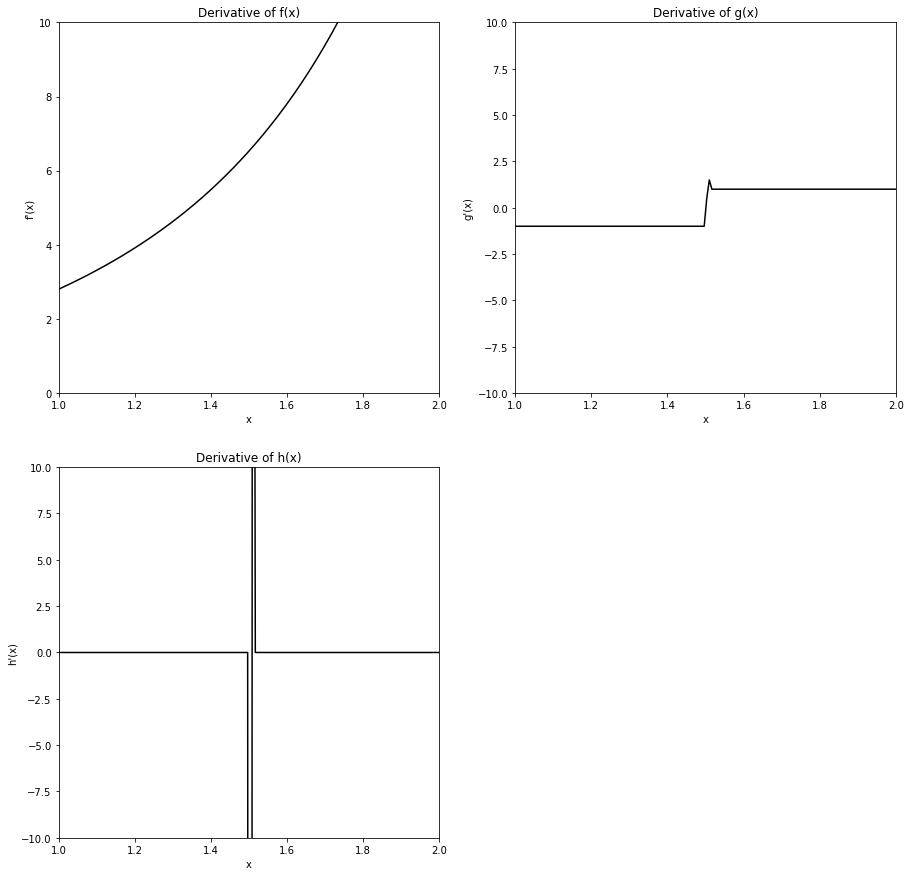

In [4]:
x = numpy.linspace(1, 2, 150)
f = lambda x: x**3 / numpy.sin(x)
g = lambda x: abs(x - 3/2)
def h(x):
    if x > 3/2:
        h = 0
    else:
        h = 1
    return h

f_prime_hat = compute_prime(x, f)
g_prime_hat = compute_prime(x, g)
h_prime_hat = compute_prime(x, h)


fig = plt.figure(figsize=(15, 15))
axes = fig.add_subplot(2, 2, 1)
axes.plot(x, f_prime_hat, 'k')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((0, 10))
axes.set_xlabel("x")
axes.set_ylabel("f'(x)")
axes.set_title("Derivative of f(x)")

axes = fig.add_subplot(2, 2, 2)
axes.plot(x, g_prime_hat, 'k')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-10, 10))
axes.set_xlabel("x")
axes.set_ylabel("g'(x)")
axes.set_title("Derivative of g(x)")

axes = fig.add_subplot(2, 2, 3)
axes.plot(x, h_prime_hat, 'k')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-10, 10))
axes.set_xlabel("x")
axes.set_ylabel("h'(x)")
axes.set_title("Derivative of h(x)")

plt.show()

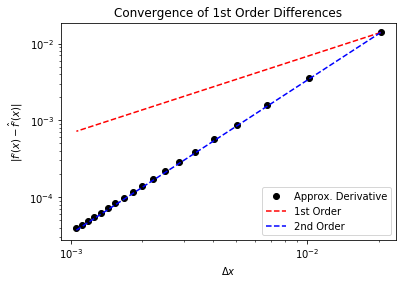

In [15]:
f_prime = lambda x: (3*(x**2)*numpy.sin(x) - (x**3)*numpy.cos(x))/(numpy.sin(x))**2
f = lambda x: x**3 / numpy.sin(x)

delta_x = []
error = []
for N in range (50, 1000, 50):
    x_hat = numpy.linspace(1, 2, N)
    delta_x.append(x_hat[1] - x_hat[0])
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[0] = (- f(x_hat[2]) + 4 * f(x_hat[1]) - 3 * f(x_hat[0])) / (2 * delta_x[-1])
    f_prime_hat[1] = (- f(x_hat[3]) + 4 * f(x_hat[2]) - 3 * f(x_hat[1])) / (2* delta_x[-1])
    for i in range (2,N):
        f_prime_hat[i] = (3 * f(x_hat[i]) - 4 * f(x_hat[i-1]) + f(x_hat[i-2])) / (2 * delta_x[-1])
    error.append(numpy.linalg.norm(numpy.abs(f_prime(x_hat ) - f_prime_hat), ord=numpy.infty)) 


error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")


plt.show()

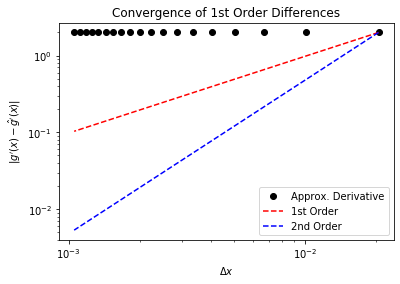

In [6]:
def g_prime(x):
    return (x-3/2)/abs(x-3/2)

delta_x = []
error = []
for N in range (50, 1000, 50):
    x_hat = numpy.linspace(1, 2, N)
    delta_x.append(x_hat[1] - x_hat[0])
    g_prime_hat = numpy.empty(x_hat.shape)
    g_prime_hat[0] = (- g(x_hat[2]) + 4 * g(x_hat[1]) - 3 * g(x_hat[0])) / (2 * delta_x[-1])
    g_prime_hat[1] = (- g(x_hat[3]) + 4 * g(x_hat[2]) - 3 * g(x_hat[1])) / (2* delta_x[-1])
    for i in range (2,N):
        g_prime_hat[i] = (3 * g(x_hat[i]) - 4 * g(x_hat[i-1]) + g(x_hat[i-2])) / (2 * delta_x[-1])
    error.append(numpy.linalg.norm(numpy.abs(g_prime(x_hat + delta_x[-1]) - g_prime_hat), ord=numpy.infty)) 


error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|g'(x) - \hat{g}'(x)|$")


plt.show()

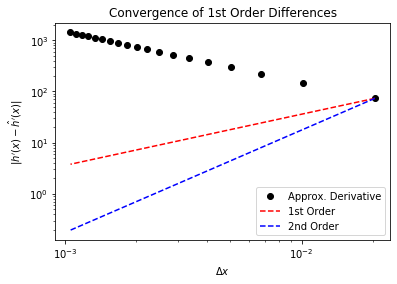

In [7]:
h = lambda x: 0.5 * (numpy.sign(x-3/2) + 1)
def h_prime(x):
    return 0/(x)

delta_x = []
error = []
for N in range (50, 1000, 50):
    x_hat = numpy.linspace(1, 2, N)
    delta_x.append(x_hat[1] - x_hat[0])
    h_prime_hat = numpy.empty(x_hat.shape)
    h_prime_hat[0] = (- h(x_hat[2]) + 4 * h(x_hat[1]) - 3 * h(x_hat[0])) / (2 * delta_x[-1])
    h_prime_hat[1] = (- h(x_hat[3]) + 4 * h(x_hat[2]) - 3 * h(x_hat[1])) / (2* delta_x[-1])
    for i in range (2,N):
        h_prime_hat[i] = (3 * h(x_hat[i]) - 4 * h(x_hat[i-1]) + h(x_hat[i-2])) / (2 * delta_x[-1])
    error.append(numpy.linalg.norm(numpy.abs(h_prime(x_hat + delta_x[-1]) - h_prime_hat), ord=numpy.infty)) 


error = numpy.array(error)
delta_x = numpy.array(delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|h'(x) - \hat{h}'(x)|$")


plt.show()

For smooth function $f(x)$, its derivative is continuous, and the error converges in 1st order. 

For function $g(x)$ and $h(x)$, they are not smooth and derivatives are discontinuous at some points. By using the infinity-norm, we are comparing the maximum error. The graph show that the error does not converge in any order. 

# Question 2

Solve the following PDEs showing the relevant steps and plot a few time snapshots of the solution.

**(a)** [20] $u_t = \kappa u_{xx}$ with $x \in \Omega = (0, L)$, the boundary conditions $u(0, t)_x = 0$ and $u_x(L, t) = 0$, and the initial condition $u(x, 0) = 2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)$.  When plotting the solution pick a value for $L$ and play with values of $\kappa$.  Make sure your solution makes sense as $t \rightarrow \infty$.

Set $u(x, t) = G(t) \phi (x)$. The differential equation becomes $G_t(t) \phi (x) = \kappa G(t) \phi_{xx}(x)$ $$\\$$
Let $$\frac{G_t(t)}{\kappa G(t)} = \frac{\phi_{xx}(x)}{\phi (x)} = -\lambda $$ 
Then we have $$\phi_{xx} = -\lambda \phi$$ with $$\phi_x (0) = \phi_x (L) = 0 $$ 
This leads to the solution of $$\phi_n (x) = A_n \cos (\frac{n \pi x}{L})$$ with $$\lambda_n = (\frac{n \pi}{L})^2$$ and $A_n$ is a constant.
We also have $$G_t = -\kappa \lambda G$$ This leads to the solution of $$G_n(t) = G(0)e^{-\kappa \lambda t}$$
By principle of superposition, $$u(x, t) = \sum_{n=0}^{\infty} A_n e^{-\kappa \lambda t} \cos (\frac{n \pi x}{L})$$
Apply the initial condition, $$u(x, 0) = \sum_{n=0}^{\infty} A_n \cos (\frac{n \pi x}{L}) = 2 - \cos(\frac{\pi x}{L}) + 3 \cos (\frac{3 \pi x}{L})$$
Thus we have $$A_0 = 2, A_1 = -1, A_3 = 3$$ and all other $A_n$ are 0.
Hence $$u(x, t) = 2 - e^{-\kappa (\frac{\pi}{L})^2 t} \cos (\frac{\pi x}{L}) + 3 e^{-\kappa (\frac{3 \pi}{L})^2 t} \cos(\frac{3 \pi x}{L})$$

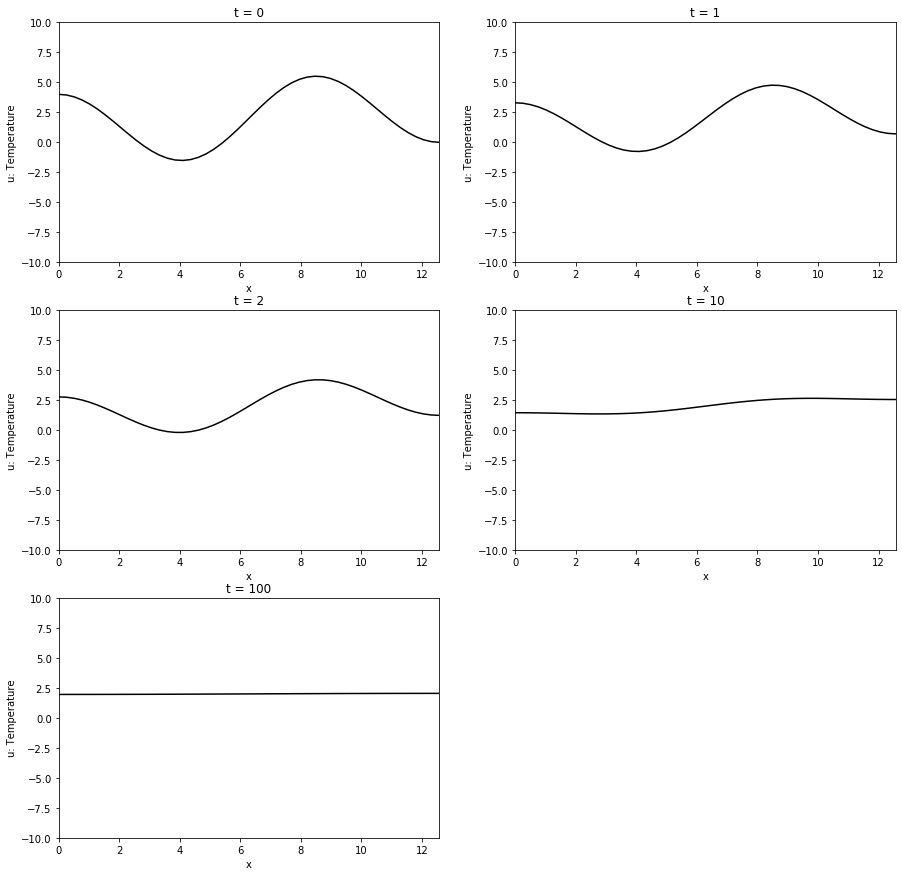

In [8]:
k = 1/2
L = 4 * math.pi
x = numpy.linspace(0, L, 50)
t = 0
u = 2 - math.exp(-k*(((math.pi) / L)**2) * t) * numpy.cos((math.pi) * x / L) + 3 * math.exp(-k*((3 * (math.pi) / L)**2) * t) * numpy.cos(3 * (math.pi) * x / L)    


fig = plt.figure(figsize=(15, 15))
ax0 = fig.add_subplot(3, 2, 1, xlim = (x[0], x[-1]), ylim = (-10,10))
ax0.plot(x, u, 'k')
ax0.set_xlabel("x")
ax0.set_ylabel("u: Temperature")
ax0.set_title("t = 0")

t = 1
u = 2 - math.exp(-k*(((math.pi) / L)**2) * t) * numpy.cos((math.pi) * x / L) + 3 * math.exp(-k*((3 * (math.pi) / L)**2) * t) * numpy.cos(3 * (math.pi) * x / L)    

ax1 = fig.add_subplot(3, 2, 2, xlim = (x[0], x[-1]), ylim = (-10,10))
ax1.plot(x, u, 'k')
ax1.set_xlabel("x")
ax1.set_ylabel("u: Temperature")
ax1.set_title("t = 1")

t = 2
u = 2 - math.exp(-k*(((math.pi) / L)**2) * t) * numpy.cos((math.pi) * x / L) + 3 * math.exp(-k*((3 * (math.pi) / L)**2) * t) * numpy.cos(3 * (math.pi) * x / L)    

ax2 = fig.add_subplot(3, 2, 3, xlim = (x[0], x[-1]), ylim = (-10,10))
ax2.plot(x, u, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u: Temperature")
ax2.set_title("t = 2")

t = 10
u = 2 - math.exp(-k*(((math.pi) / L)**2) * t) * numpy.cos((math.pi) * x / L) + 3 * math.exp(-k*((3 * (math.pi) / L)**2) * t) * numpy.cos(3 * (math.pi) * x / L)    

ax2 = fig.add_subplot(3, 2, 4, xlim = (x[0], x[-1]), ylim = (-10,10))
ax2.plot(x, u, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u: Temperature")
ax2.set_title("t = 10")

t = 100
u = 2 - math.exp(-k*(((math.pi) / L)**2) * t) * numpy.cos((math.pi) * x / L) + 3 * math.exp(-k*((3 * (math.pi) / L)**2) * t) * numpy.cos(3 * (math.pi) * x / L)    

ax2 = fig.add_subplot(3, 2, 5, xlim = (x[0], x[-1]), ylim = (-10,10))
ax2.plot(x, u, 'k')
ax2.set_xlabel("x")
ax2.set_ylabel("u: Temperature")
ax2.set_title("t = 100")

plt.show()

**(b)** [20] Solve the PDE $u_t + \left(\frac{1}{2}u^2\right)_x = 0$ where $x \in \Omega = \mathbb R$ and the initial conditions
$$ 
    u(x,0) = \left \{ \begin{aligned}
        1 & & x \leq 0 \\
        2 & & x > 0
    \end{aligned} \right .
$$
In addition to plotting the solution also mark the edges of interesting regions such as the rarefaction fan or the shock.

The equation becomes $$u_t + \frac{1}{2} 2 u u_x = u_t + u u_x = 0$$
The characteristic equation is $$\frac{dx}{dt} = u$$
Then $$\frac{d}{dt} u(x(t), t) = 0$$
This leads to the solution that $$u(x(t), t) = u(x_0, 0)$$
We also have $$x(t) = x_0 + u(x_0, 0) t$$
With the initial considtions, the characteristic curve is 
$$ x(t) = \left \{ \begin{aligned} 
        t + x_0  & & x \leq 0 \\
        2t + x_0  & & x > 0
        \end{aligned} \right .$$

This implies the solution is of the form $$u(x, t) = u(\xi)$$ where $\xi = \frac{x}{t}$

Plug this into the original equation we have $$u'\frac{\partial \xi}{\partial t} + u u' \frac{\partial \xi}{\partial x} = 0$$
$$u'(-\frac{x}{t^2} + u \frac{1}{t}) = 0$$
$$u'(-\xi + u) = 0$$
Thus, the solution is $$u(x, t) = \frac{x}{t}$$

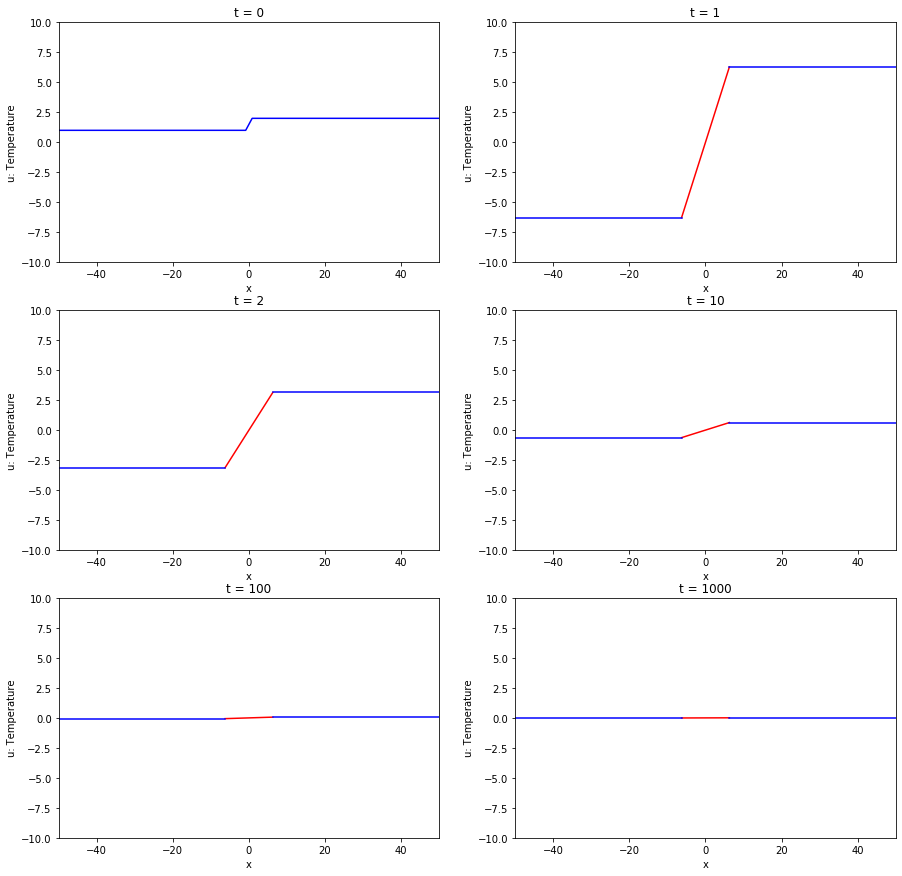

In [9]:
x = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 20)
x0 = numpy.linspace(-50, -2*numpy.pi , 20)
x1 = numpy.linspace(2*numpy.pi, 50, 20)

fig = plt.figure(figsize=(15, 15))

ax0 = fig.add_subplot(3, 2, 1, xlim = (-50, 50), ylim = (-10,10))
x_0 = numpy.linspace(-50, 50, 60)
y = numpy.piecewise(x_0, [x_0 <= 0, x_0 > 0], [1, 2])
ax0.plot(x_0, y, 'b')
ax0.set_xlabel("x")
ax0.set_ylabel("u: Temperature")
ax0.set_title("t = 0")

t = 1
u = x/t
y1 = []
y2 = []
for i in range (len(x0)):
    y1.append(u[0])
    y2.append(u[-1])
ax1 = fig.add_subplot(3, 2, 2, xlim = (-50, 50), ylim = (-10,10))
ax1.plot(x, u, 'r')
ax1.plot(x0, y1, 'b')
ax1.plot(x1, y2, 'b')
ax1.set_xlabel("x")
ax1.set_ylabel("u: Temperature")
ax1.set_title("t = 1")

t = 2
u = x/t
y1 = []
y2 = []
for i in range (len(x0)):
    y1.append(u[0])
    y2.append(u[-1])
ax2 = fig.add_subplot(3, 2, 3, xlim = (-50, 50), ylim = (-10,10))
ax2.plot(x, u, 'r')
ax2.plot(x0, y1, 'b')
ax2.plot(x1, y2, 'b')
ax2.set_xlabel("x")
ax2.set_ylabel("u: Temperature")
ax2.set_title("t = 2")

t = 10
u = x/t
y1 = []
y2 = []
for i in range (len(x0)):
    y1.append(u[0])
    y2.append(u[-1])
ax3 = fig.add_subplot(3, 2, 4, xlim = (-50, 50), ylim = (-10,10))
ax3.plot(x, u, 'r')
ax3.plot(x0, y1, 'b')
ax3.plot(x1, y2, 'b')
ax3.set_xlabel("x")
ax3.set_ylabel("u: Temperature")
ax3.set_title("t = 10")

t = 100
u = x/t
y1 = []
y2 = []
for i in range (len(x0)):
    y1.append(u[0])
    y2.append(u[-1])
ax4 = fig.add_subplot(3, 2, 5, xlim = (-50, 50), ylim = (-10,10))
ax4.plot(x, u, 'r')
ax4.plot(x0, y1, 'b')
ax4.plot(x1, y2, 'b')
ax4.set_xlabel("x")
ax4.set_ylabel("u: Temperature")
ax4.set_title("t = 100")

t = 1000
u = x/t
y1 = []
y2 = []
for i in range (len(x0)):
    y1.append(u[0])
    y2.append(u[-1])
ax5 = fig.add_subplot(3, 2, 6, xlim = (-50, 50), ylim = (-10,10))
ax5.plot(x, u, 'r')
ax5.plot(x0, y1, 'b')
ax5.plot(x1, y2, 'b')
ax5.set_xlabel("x")
ax5.set_ylabel("u: Temperature")
ax5.set_title("t = 1000")

plt.show()

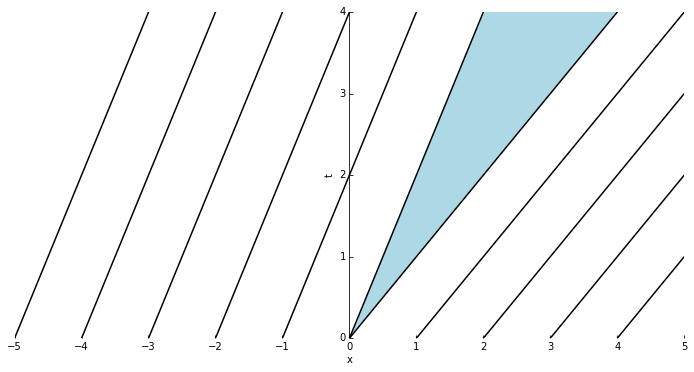

In [10]:
fig = plt.figure(figsize = (12, 6))
ax = axisartist.Subplot(fig, 111)
fig.add_axes(ax)
ax.axis[:].set_visible(False)

ax.axis["x"] = ax.new_floating_axis(0, 0)
ax.axis["y"] = ax.new_floating_axis(1, 0)

ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("left")
ax.axis["x"].label.set_text("x")
ax.axis["y"].label.set_text("t")


ax.set_xticks(numpy.linspace(-5, 5, num = 11))
ax.set_yticks(numpy.linspace(0, 4, num = 5))

plt.xlim(-5, 5)
plt.ylim(0, 4)

def gen_line(m, b):
    y = m * x + b
    return y

x = numpy.linspace(-5, 5, 11)

for i in range (0, 12, 2):
    y = gen_line(2, i)
    ax.plot(x, y, color = "k")
    if (i==0):
        plt.fill_between(x, y, where=(0<=x) & (x<=5), facecolor = 'lightblue')

for i in range (-4, 1):
    y = gen_line(1, i)
    ax.plot(x, y, color = "k")
    if(i==0):
        plt.fill_between(x, y, where=(0<=x) & (x<=5), facecolor = 'white')

plt.show()